In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
f50 = np.load("f50.npy")
f100 = np.load("f100.npy")
f150 = np.load("f150.npy")
f200 = np.load("f200.npy")
f50_100 = np.load("f50_100.npy")

In [3]:
f50_100_target = []
for i in range(100):
    zero_um = (0,1)
    f50_100_target.append(zero_um)

for i in range(100):
    um_zero = (1,0)
    f50_100_target.append(um_zero)

In [4]:
# f50_100_target

In [5]:
X = np.reshape(f50_100, (200, 1000, 1))
y = np.array(f50_100_target)

In [6]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [7]:
import math
n_input_layer = 1000
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 32


In [8]:
model=Sequential()
model.add(SimpleRNN(units=n_hidden_layer, 
                    input_shape=(1000,1), 
                    return_sequences=True, 
                    activation="relu"))
model.add(TimeDistributed(Dense(1)))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1000, 32)          1088      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1000, 1)           33        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2002      
Total params: 3,123
Trainable params: 3,123
Non-trainable params: 0
_________________________________________________________________


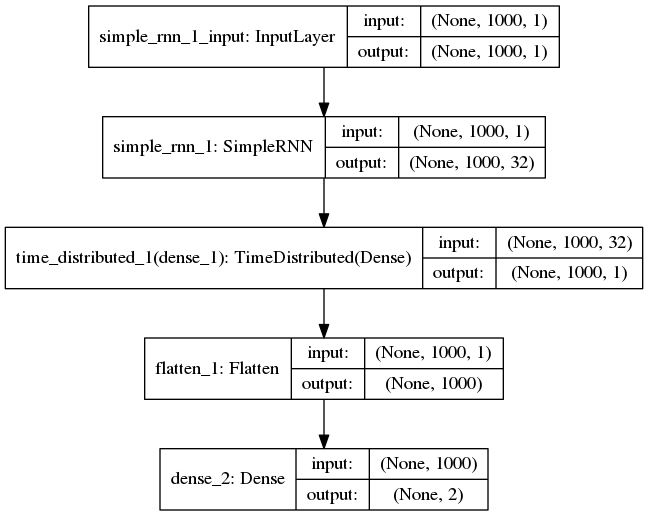

In [9]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.fit(X, y, epochs = 100, batch_size = 32)

Epoch 1/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0369
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 4.0544e-04
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 1.0806e-04
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 4.5056e-05
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 2.0591e-05
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 1.0225e-05
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 5.0959e-06
Epoch 8/100
200/200 [==============================] - 1s 6ms/step - loss: 2.5262e-06
Epoch 9/100
200/200 [==============================] - 1s 7ms/step - loss: 1.0659e-06
Epoch 10/100
200/200 [==============================] - 1s 6ms/step - loss: 3.6308e-07
Epoch 11/100
200/200 [==============================] - 1s 7ms/step - loss: 2.0852e-07
Epoch 12/100
200/200 [==============================] - 

200/200 [==============================] - 1s 6ms/step - loss: 3.9294e-12
Epoch 96/100
200/200 [==============================] - 1s 6ms/step - loss: 3.9171e-12
Epoch 97/100
200/200 [==============================] - 1s 6ms/step - loss: 3.8218e-12
Epoch 98/100
200/200 [==============================] - 1s 6ms/step - loss: 3.7905e-12
Epoch 99/100
200/200 [==============================] - 1s 7ms/step - loss: 3.6729e-12
Epoch 100/100
200/200 [==============================] - 1s 6ms/step - loss: 3.6342e-12


In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
pi = 3.1415
N = 1000
t = np.arange(0,N)
f = 100

In [13]:
qtd_amostras = 20
test = []
test_target = []

f = 50
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1)) 
    test_target.append(zero_um)
    test.append(x)
    
f = 100
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1))    
    test_target.append(um_zero)
    test.append(x)
    
test = np.reshape(test, (40, 1000, 1))

In [19]:
predictions = model.predict(test)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[2.4785602e-06 9.9999821e-01] expected (0, 1)
[1.0837837e-06 9.9999976e-01] expected (0, 1)
[1.0625721e-06 9.9999988e-01] expected (0, 1)
[1.1886302e-06 9.9999988e-01] expected (0, 1)
[9.075895e-07 1.000000e+00] expected (0, 1)
[7.5599396e-06 1.0000000e+00] expected (0, 1)
[1.1468638e-06 9.9999988e-01] expected (0, 1)
[1.0166633e-06 1.0000000e+00] expected (0, 1)
[1.0682111e-06 9.9999988e-01] expected (0, 1)
[8.195392e-06 1.000000e+00] expected (0, 1)
[1.2034548e-06 9.9999988e-01] expected (0, 1)
[2.2528372e-06 1.0000000e+00] expected (0, 1)
[9.678115e-07 9.999999e-01] expected (0, 1)
[1.3547409e-06 9.9999952e-01] expected (0, 1)
[5.1493166e-06 1.0000000e+00] expected (0, 1)
[1.1936113e-06 9.9999988e-01] expected (0, 1)
[1.7286972e-06 9.9999928e-01] expected (0, 1)
[1.1551481e-06 1.0000000e+00] expected (0, 1)
[5.1196625e-06 1.0000000e+00] expected (0, 1)
[2.222342e-06 1.000000e+00] expected (0, 1)
[1.0000000e+00 1.4652311e-08] expected (1, 0)
[1.0000000e+00 1.1036917e-09] expected (1,

In [20]:
predictions = model.predict_classes(test)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
1 expected (0, 1)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
0 expected (1, 0)
